### 02 Email Classifier


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
ds = pd.read_csv("emails.csv")
ds.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# data preprocessing
# remove the unwanted columns

ds = ds.drop(columns=["Email No."])
ds.head()

# gather labels in a sepearate array
labels = ds["Prediction"].values


# remove labeles from dataset
ds.drop(columns=["Prediction"])

features = ds.values

In [5]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4137, 3001)
(4137,)
(1035, 3001)
(1035,)


#### KNN Classification

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       739
           1       0.73      0.84      0.78       296

    accuracy                           0.87      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.87      0.87      0.87      1035



<Axes: >

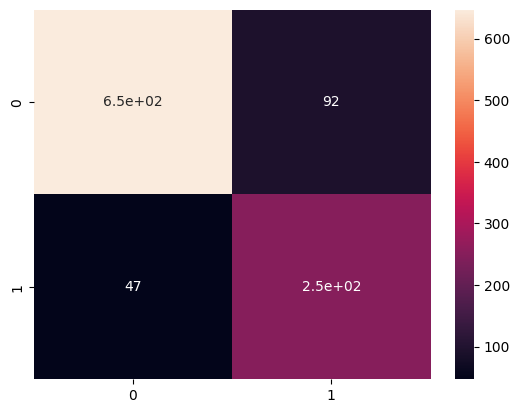

In [6]:
# Binary classification with KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)



print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

#### Binary Classification with SVMs


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       0.99      1.00      0.99       296

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



<Axes: >

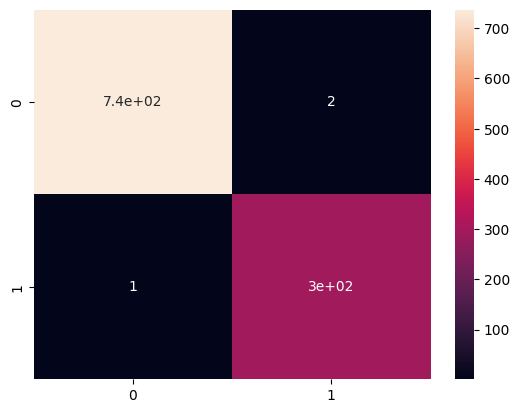

In [29]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)